In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('household_power_consumption.csv')

In [3]:
shape = data.shape
print(f'Dataset it {shape[0]} rows by {shape[1]} columns')
data.head()

Dataset it 2075259 rows by 9 columns


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
data.replace('?', np.nan, inplace=True)
print(data.count())
data.dropna(inplace=True)
print(f'Rows with missing values: {shape[0] - data.shape[0]}')

Date                     2075259
Time                     2075259
Global_active_power      2049280
Global_reactive_power    2049280
Voltage                  2049280
Global_intensity         2049280
Sub_metering_1           2049280
Sub_metering_2           2049280
Sub_metering_3           2049280
dtype: int64
Rows with missing values: 25979


In [5]:
data = data.astype({'Global_active_power': 'float64', 'Global_reactive_power': 'float64', 'Voltage': 'float64',
                    'Global_intensity': 'float64', 'Sub_metering_1': 'float64', 'Sub_metering_2': 'float64'})

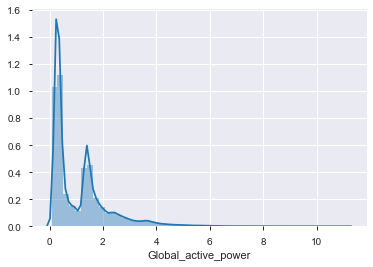

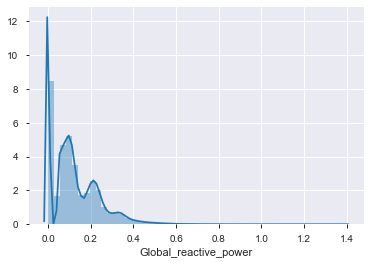

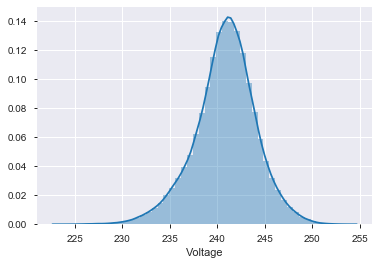

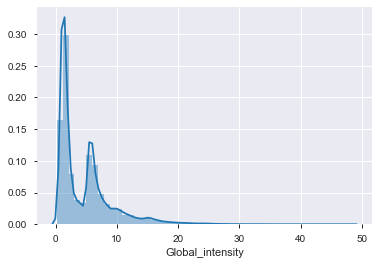

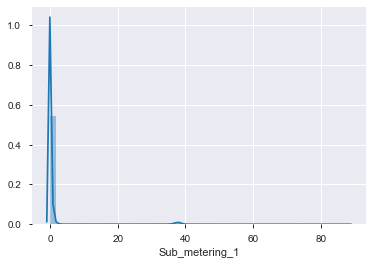

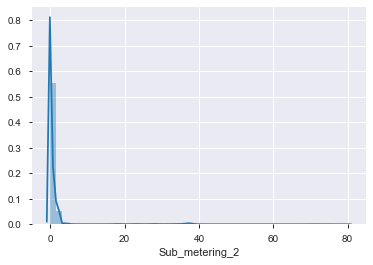

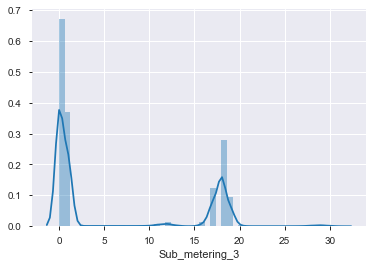

In [23]:
for col in data.columns.drop(['Date','Time']):
    sns.distplot(data[col])
    plt.show()

In [6]:
datetime = pd.to_datetime(data['Date'] + ' ' + data['Time'])

In [8]:
data.drop(columns='Time', inplace=True)

In [9]:
data['Date'] = datetime

In [10]:
data.rename(columns={'Date': 'Datetime'}, inplace=True)

In [11]:
data.index = datetime

In [68]:
av = data['Global_active_power'].resample('D').mean()
av.dropna(inplace=True)

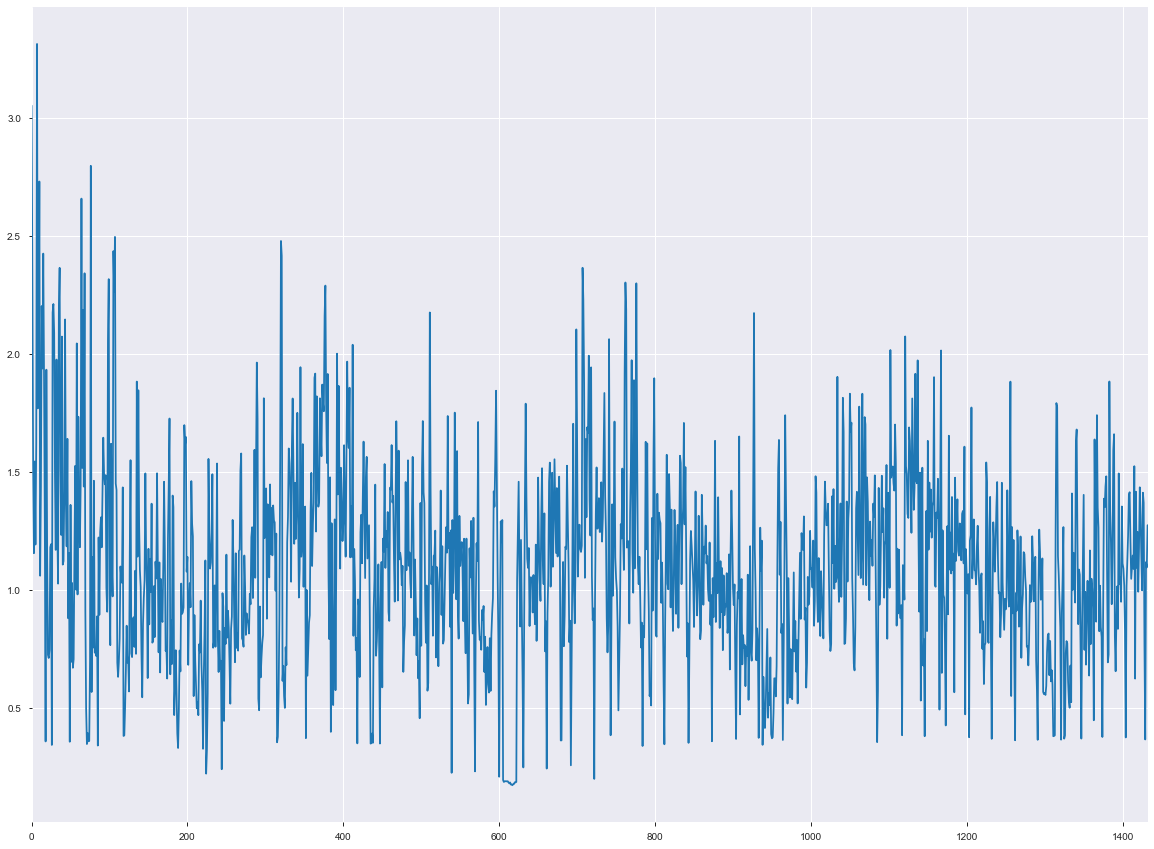

In [87]:
sns.tsplot(av)
plt.show()
plt.rcParams['figure.figsize'] = (20,15)

We can see from this timeseries plot that there are obvious cyclic seasonal changes in power consumption, but it doesn't really change with years, except for the abnormality at the beginning

In [13]:
selected = data['2008-02-01' : '2008-02-02']

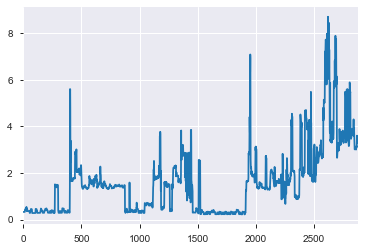

In [17]:
sns.tsplot(selected['Global_active_power'])
plt.show()

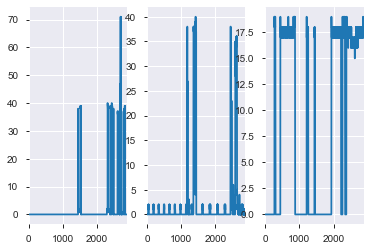

In [14]:
plt.subplot(1, 3, 1)
sns.tsplot(selected['Sub_metering_1'])
plt.subplot(1, 3, 2)
sns.tsplot(selected['Sub_metering_2'])
plt.subplot(1, 3, 3)
sns.tsplot(selected['Sub_metering_3'])
plt.show()

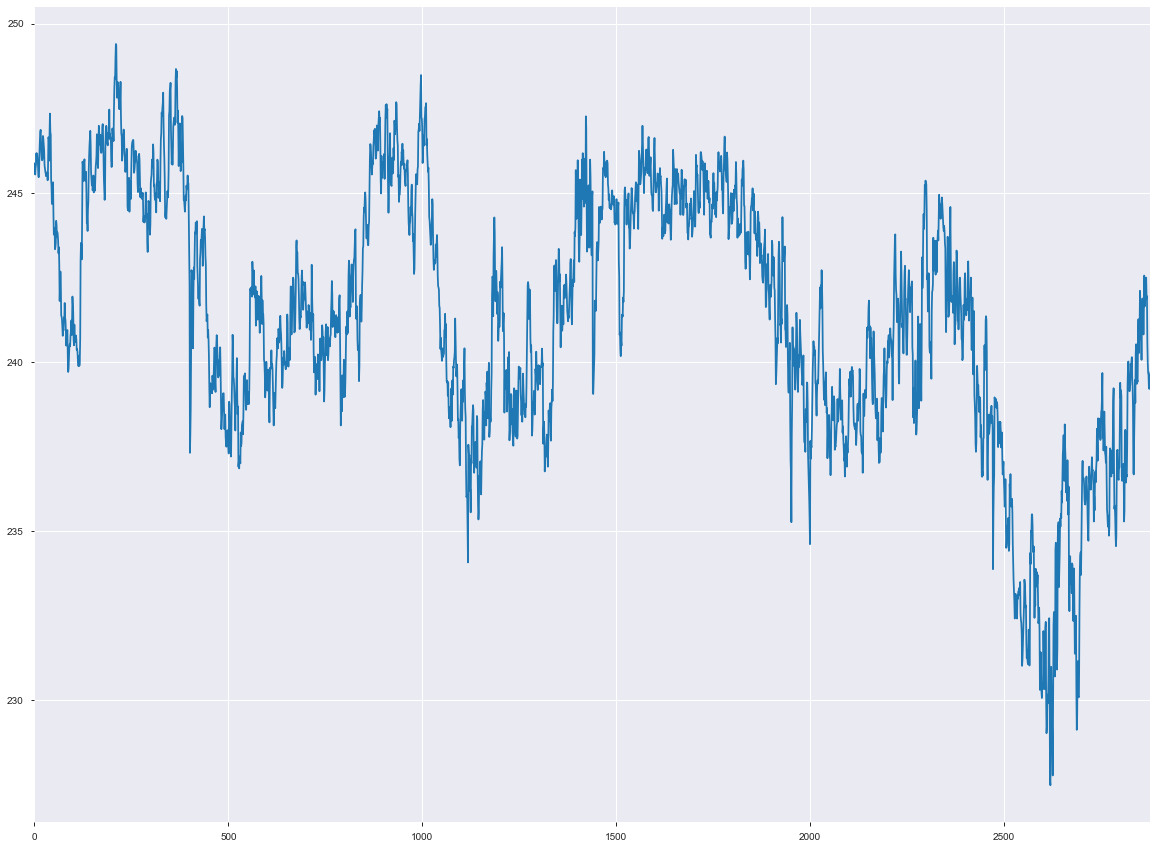

In [114]:
sns.tsplot(selected['Voltage'])
plt.show()

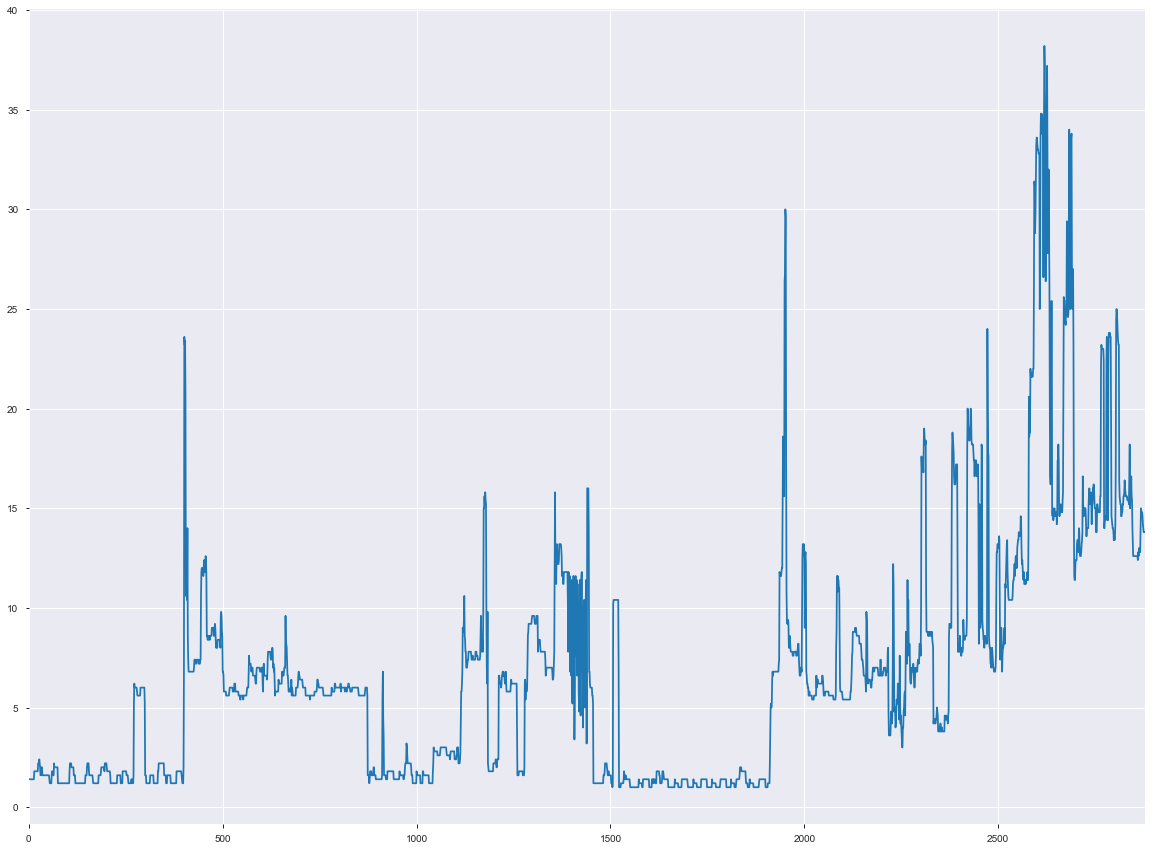

In [115]:
sns.tsplot(selected['Global_intensity'])
plt.show()

In [116]:
active_without_sub = selected['Global_active_power'] * 1000 / 60
- selected['Sub_metering_1'] - selected['Sub_metering_2'] - selected['Sub_metering_3']

2008-02-01 00:00:00    -0.0
2008-02-01 00:01:00    -0.0
2008-02-01 00:02:00    -0.0
2008-02-01 00:03:00    -0.0
2008-02-01 00:04:00    -0.0
2008-02-01 00:05:00    -0.0
2008-02-01 00:06:00    -0.0
2008-02-01 00:07:00    -0.0
2008-02-01 00:08:00    -0.0
2008-02-01 00:09:00    -0.0
2008-02-01 00:10:00    -0.0
2008-02-01 00:11:00    -0.0
2008-02-01 00:12:00    -0.0
2008-02-01 00:13:00    -0.0
2008-02-01 00:14:00    -0.0
2008-02-01 00:15:00    -0.0
2008-02-01 00:16:00    -0.0
2008-02-01 00:17:00    -0.0
2008-02-01 00:18:00    -0.0
2008-02-01 00:19:00    -0.0
2008-02-01 00:20:00    -0.0
2008-02-01 00:21:00    -0.0
2008-02-01 00:22:00    -0.0
2008-02-01 00:23:00    -0.0
2008-02-01 00:24:00    -0.0
2008-02-01 00:25:00    -0.0
2008-02-01 00:26:00    -0.0
2008-02-01 00:27:00    -0.0
2008-02-01 00:28:00    -0.0
2008-02-01 00:29:00    -0.0
                       ... 
2008-02-02 23:30:00   -18.0
2008-02-02 23:31:00   -18.0
2008-02-02 23:32:00   -18.0
2008-02-02 23:33:00   -18.0
2008-02-02 23:34:00 

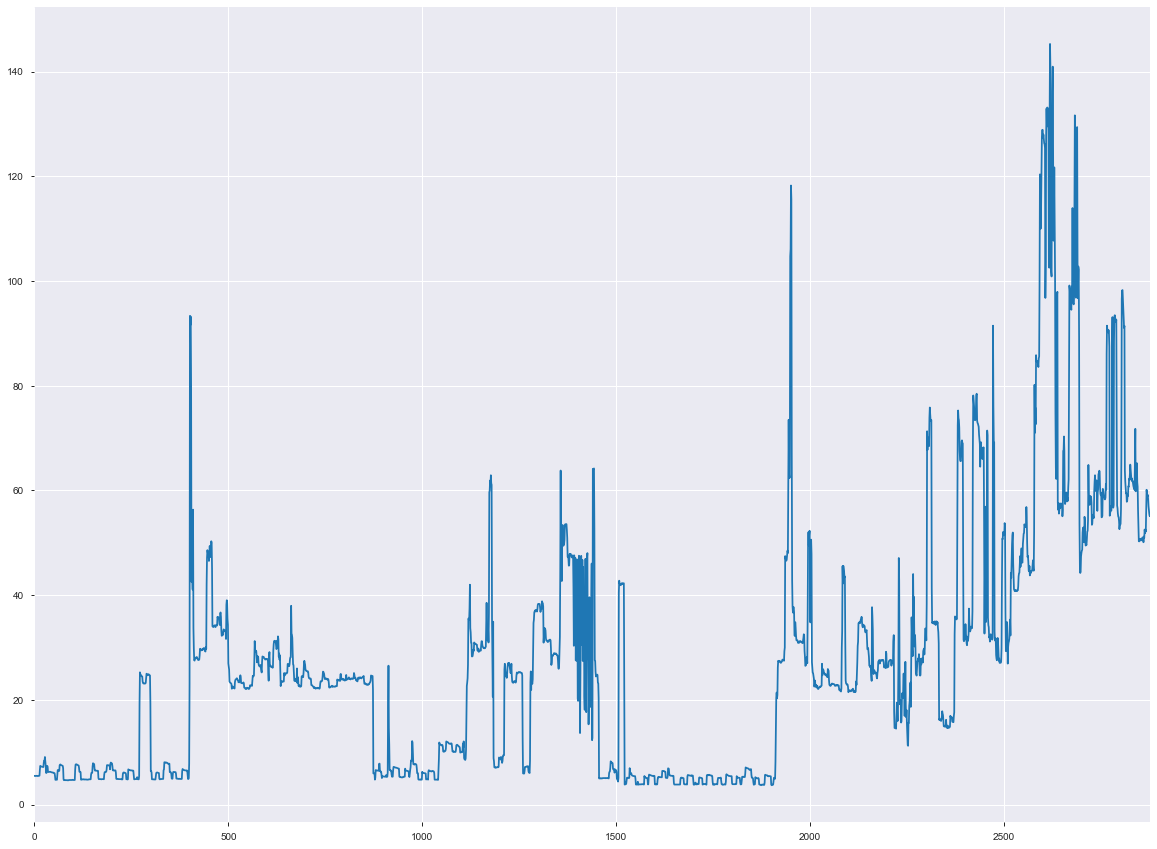

In [118]:
sns.tsplot(active_without_sub)
plt.show()

In [25]:
list(data[data.Voltage > data.Voltage.quantile(0.99)].resample('D').groups.keys())

[Timestamp('2006-12-17 00:00:00', freq='D'),
 Timestamp('2006-12-18 00:00:00', freq='D'),
 Timestamp('2006-12-19 00:00:00', freq='D'),
 Timestamp('2006-12-20 00:00:00', freq='D'),
 Timestamp('2006-12-21 00:00:00', freq='D'),
 Timestamp('2006-12-22 00:00:00', freq='D'),
 Timestamp('2006-12-23 00:00:00', freq='D'),
 Timestamp('2006-12-24 00:00:00', freq='D'),
 Timestamp('2006-12-25 00:00:00', freq='D'),
 Timestamp('2006-12-26 00:00:00', freq='D'),
 Timestamp('2006-12-27 00:00:00', freq='D'),
 Timestamp('2006-12-28 00:00:00', freq='D'),
 Timestamp('2006-12-29 00:00:00', freq='D'),
 Timestamp('2006-12-30 00:00:00', freq='D'),
 Timestamp('2006-12-31 00:00:00', freq='D'),
 Timestamp('2007-01-01 00:00:00', freq='D'),
 Timestamp('2007-01-02 00:00:00', freq='D'),
 Timestamp('2007-01-03 00:00:00', freq='D'),
 Timestamp('2007-01-04 00:00:00', freq='D'),
 Timestamp('2007-01-05 00:00:00', freq='D'),
 Timestamp('2007-01-06 00:00:00', freq='D'),
 Timestamp('2007-01-07 00:00:00', freq='D'),
 Timestamp

In [17]:
list(data[data.Voltage < data.Voltage.quantile(0.01)].resample('D').groups.keys())

[Timestamp('2006-12-16 00:00:00', freq='D'),
 Timestamp('2006-12-17 00:00:00', freq='D'),
 Timestamp('2006-12-18 00:00:00', freq='D'),
 Timestamp('2006-12-19 00:00:00', freq='D'),
 Timestamp('2006-12-20 00:00:00', freq='D'),
 Timestamp('2006-12-21 00:00:00', freq='D'),
 Timestamp('2006-12-22 00:00:00', freq='D'),
 Timestamp('2006-12-23 00:00:00', freq='D'),
 Timestamp('2006-12-24 00:00:00', freq='D'),
 Timestamp('2006-12-25 00:00:00', freq='D'),
 Timestamp('2006-12-26 00:00:00', freq='D'),
 Timestamp('2006-12-27 00:00:00', freq='D'),
 Timestamp('2006-12-28 00:00:00', freq='D'),
 Timestamp('2006-12-29 00:00:00', freq='D'),
 Timestamp('2006-12-30 00:00:00', freq='D'),
 Timestamp('2006-12-31 00:00:00', freq='D'),
 Timestamp('2007-01-01 00:00:00', freq='D'),
 Timestamp('2007-01-02 00:00:00', freq='D'),
 Timestamp('2007-01-03 00:00:00', freq='D'),
 Timestamp('2007-01-04 00:00:00', freq='D'),
 Timestamp('2007-01-05 00:00:00', freq='D'),
 Timestamp('2007-01-06 00:00:00', freq='D'),
 Timestamp

In [20]:
list(data[data.Global_intensity > data.Global_intensity.quantile(0.99)].resample('D').groups.keys())

[Timestamp('2006-12-16 00:00:00', freq='D'),
 Timestamp('2006-12-17 00:00:00', freq='D'),
 Timestamp('2006-12-18 00:00:00', freq='D'),
 Timestamp('2006-12-19 00:00:00', freq='D'),
 Timestamp('2006-12-20 00:00:00', freq='D'),
 Timestamp('2006-12-21 00:00:00', freq='D'),
 Timestamp('2006-12-22 00:00:00', freq='D'),
 Timestamp('2006-12-23 00:00:00', freq='D'),
 Timestamp('2006-12-24 00:00:00', freq='D'),
 Timestamp('2006-12-25 00:00:00', freq='D'),
 Timestamp('2006-12-26 00:00:00', freq='D'),
 Timestamp('2006-12-27 00:00:00', freq='D'),
 Timestamp('2006-12-28 00:00:00', freq='D'),
 Timestamp('2006-12-29 00:00:00', freq='D'),
 Timestamp('2006-12-30 00:00:00', freq='D'),
 Timestamp('2006-12-31 00:00:00', freq='D'),
 Timestamp('2007-01-01 00:00:00', freq='D'),
 Timestamp('2007-01-02 00:00:00', freq='D'),
 Timestamp('2007-01-03 00:00:00', freq='D'),
 Timestamp('2007-01-04 00:00:00', freq='D'),
 Timestamp('2007-01-05 00:00:00', freq='D'),
 Timestamp('2007-01-06 00:00:00', freq='D'),
 Timestamp

In [21]:
list(data[data.Global_intensity < data.Global_intensity.quantile(0.01)].resample('D').groups.keys())

[Timestamp('2007-01-08 00:00:00', freq='D'),
 Timestamp('2007-01-09 00:00:00', freq='D'),
 Timestamp('2007-01-10 00:00:00', freq='D'),
 Timestamp('2007-01-11 00:00:00', freq='D'),
 Timestamp('2007-01-12 00:00:00', freq='D'),
 Timestamp('2007-01-13 00:00:00', freq='D'),
 Timestamp('2007-01-14 00:00:00', freq='D'),
 Timestamp('2007-01-15 00:00:00', freq='D'),
 Timestamp('2007-01-16 00:00:00', freq='D'),
 Timestamp('2007-01-17 00:00:00', freq='D'),
 Timestamp('2007-01-18 00:00:00', freq='D'),
 Timestamp('2007-01-19 00:00:00', freq='D'),
 Timestamp('2007-01-20 00:00:00', freq='D'),
 Timestamp('2007-01-21 00:00:00', freq='D'),
 Timestamp('2007-01-22 00:00:00', freq='D'),
 Timestamp('2007-01-23 00:00:00', freq='D'),
 Timestamp('2007-01-24 00:00:00', freq='D'),
 Timestamp('2007-01-25 00:00:00', freq='D'),
 Timestamp('2007-01-26 00:00:00', freq='D'),
 Timestamp('2007-01-27 00:00:00', freq='D'),
 Timestamp('2007-01-28 00:00:00', freq='D'),
 Timestamp('2007-01-29 00:00:00', freq='D'),
 Timestamp

In [24]:
print(np.ptp(data.Voltage), np.ptp(data.Global_intensity))

30.950000000000017 48.199999999999996


Looking at those values it seems that there arent any anomalies in voltage or current

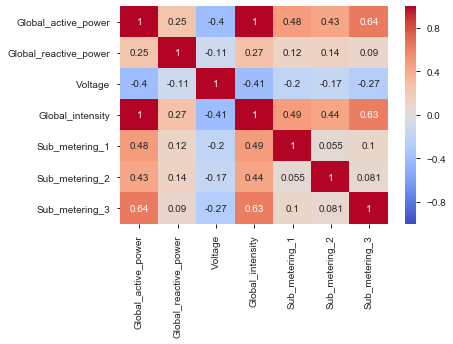

In [26]:
sns.heatmap(data.corr(), vmin=-1, cmap='coolwarm', annot=True)
plt.show()
plt.rcParams['figure.figsize'] = (10,10)

In [13]:
data.profile_report()

Here I'd say I wouldn't use sub_metering 1 and 2 as they have a whole lot of zeros, and also global intensity, as it has almost maximum correlation with global_active_power